Initial data exploration for the EEG data

In [41]:
import sys
sys.path.append(".")
#print(sys.path)
import pandas as pd
import numpy as np
import AuxFunctionsJS 
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
## importing dataframe into pandas
data = pd.read_csv("../EEG_train/eegdata_train.csv")

In [3]:
data.head()

,Unnamed: 0,subject,group,condition,trial,channel,time,voltage
0,1,co2a0000364,a,S1,0,FP1,0,-8.921
1,2,co2a0000364,a,S1,0,FP1,1,-8.433
2,3,co2a0000364,a,S1,0,FP1,2,-2.574
3,4,co2a0000364,a,S1,0,FP1,3,5.239
4,5,co2a0000364,a,S1,0,FP1,4,11.587


In [4]:
data["trial"].unique()

array([  0,   2,  10,  12,  14,  18,  20,  22,  24,  28,   4,   6,   8,
        16,  26,  30,  32,  34,  36,  38,   9,  17,  23,  25,  27,  37,
        41,  47,  55,  61,  11,  51,  71,   3,  65,  75,  77,  79,  97,
       107,  81,   7,  15,  19,  31,  39,  43,  45,  49,  57,  59,   5,
        29,  33,  35,   1,  13,  21,  53,  67,  73,  83,  87,  89,  63])

In [5]:
data["subject"].nunique()

20

In [6]:
S1_df = data[data["condition"] == "S1"]
S1_df = S1_df[S1_df["trial"] == 10]
S1_df = S1_df[S1_df["channel"] == "CZ"]

In [7]:
S1_df

,Unnamed: 0,subject,group,condition,trial,channel,time,voltage
36608,36609,co2a0000364,a,S1,10,CZ,0,13.926
36609,36610,co2a0000364,a,S1,10,CZ,1,12.950
36610,36611,co2a0000364,a,S1,10,CZ,2,10.508
36611,36612,co2a0000364,a,S1,10,CZ,3,10.997
36612,36613,co2a0000364,a,S1,10,CZ,4,14.414
...,...,...,...,...,...,...,...,...
3018747,3018748,co2c0000346,c,S1,10,CZ,251,-1.109
3018748,3018749,co2c0000346,c,S1,10,CZ,252,-2.085
3018749,3018750,co2c0000346,c,S1,10,CZ,253,-1.109
3018750,3018751,co2c0000346,c,S1,10,CZ,254,0.356


In [8]:
nChannels = S1_df["channel"].nunique()
nSamples = S1_df["time"].nunique()
nSubjects = S1_df["subject"].nunique()
nTrials = S1_df["trial"].nunique()
print("Number of subjects = "+str(nSubjects))
print("Number of Samples = "+str(nSamples))
print("Number of Channels = "+str(nChannels))
print("Number of Trials = "+str(nTrials))

#AuxFunctionsJS.CountUniqueAttributesDF(S1_df,"channel")
#AuxFunctionsJS.HelloWorld()

Number of subjects = 15
Number of Samples = 256
Number of Channels = 1
Number of Trials = 1


In [45]:
S1_np = S1_df["voltage"].to_numpy()
S1_np_group = S1_df["group"].to_numpy()

In [46]:
S1_np = S1_np.reshape(nSubjects, nSamples)
S1_np_group = S1_np_group.reshape(nSubjects, nSamples)

In [51]:
S1_np_group.shape

(15, 256)

In [11]:
print(S1_np.shape)


(15, 256)


In [12]:
S1_np

array([[ 13.926,  12.95 ,  10.508, ...,  16.856,  22.715,  25.157],
       [-13.906, -12.441, -11.464, ...,  21.25 ,  21.25 ,  23.692],
       [  7.701,   5.259,   6.236, ..., -37.71 , -38.686, -41.128],
       ...,
       [  5.463,   6.927,   8.881, ...,  -2.35 ,  -0.885,  -1.373],
       [ 12.492,  15.422,  15.422, ...,   9.562,   9.562,  11.027],
       [  5.727,   2.797,  -0.132, ...,  -1.109,   0.356,  -1.597]])

In [13]:
covMatrix = np.cov(S1_np)

In [14]:

covMatrix.shape

(15, 15)

<AxesSubplot:>

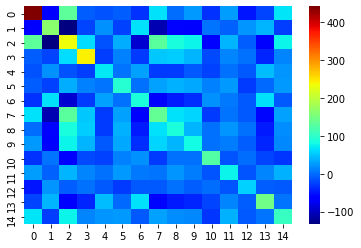

In [15]:
sn.heatmap(covMatrix, cmap="jet")

In [16]:
covMatrix[0,:]

array([442.02609076, -67.34582133, 134.25433674,  -8.86580881,
       -14.77474711,  -8.1211285 , -32.32348271,  65.44782615,
         0.65063002,  25.27086984, -32.31378743,  28.87180173,
       -48.24621608, -21.46053438,  67.74617147])

In [191]:
covMatrix[0,1:]

array([-67.34582133, 134.25433674,  -8.86580881, -14.77474711,
        -8.1211285 , -32.32348271,  65.44782615,   0.65063002,
        25.27086984, -32.31378743,  28.87180173, -48.24621608,
       -21.46053438,  67.74617147])

In [196]:
tmp = covMatrix[0,1:]
tmp.argmax()

1

In [197]:
tmp

array([-67.34582133, 134.25433674,  -8.86580881, -14.77474711,
        -8.1211285 , -32.32348271,  65.44782615,   0.65063002,
        25.27086984, -32.31378743,  28.87180173, -48.24621608,
       -21.46053438,  67.74617147])

In [198]:
tmp[1]

134.25433673782175

In [39]:
maxIndex = np.zeros( [covMatrix.shape[1], 3],  dtype=int)
tmpAbs = np.absolute(covMatrix)
for i in range(0,tmpAbs.shape[1]-1):
    tmpAbs[i,i] = 0
    
for i in range(0,tmpAbs.shape[1]-1):
        print(tmpAbs[i,:])
        tmp = tmpAbs[i,:]
        maxIndex[i,0] = i
        maxIndex[i,1] = tmp.argmax()
        maxIndex[i,2] = covMatrix[i, maxIndex[i,1]]

[  0.          67.34582133 134.25433674   8.86580881  14.77474711
   8.1211285   32.32348271  65.44782615   0.65063002  25.27086984
  32.31378743  28.87180173  48.24621608  21.46053438  67.74617147]
[ 67.34582133   0.         132.42913361  20.70609521  21.24376089
  22.99685685  65.31179471 106.49900825  60.26675619  68.56497724
   5.69779852   6.69905328  22.8885231   41.26661058  25.68066049]
[134.25433674 132.42913361   0.          63.91558974  15.57335219
  36.33662631  91.31193877 132.29277596  87.3298708   76.99079535
  60.40059791  42.2449191    8.86504065  64.39836962  77.38941275]
[ 8.86580881 20.70609521 63.91558974  0.         26.2312993  12.58432432
 28.13043819 52.30555588 55.09117268 41.10333032 18.49642933 15.09951296
  3.28049891 38.70655148 14.1107087 ]
[14.77474711 21.24376089 15.57335219 26.2312993   0.          6.33986429
 29.18813955 28.06072669 28.99206035  9.68040642 23.87945098  2.80270938
 10.34408851 46.33761788 24.08609247]
[ 8.1211285  22.99685685 36.3366263

In [40]:
maxIndex

array([[   0,    2,  134],
       [   1,    2, -132],
       [   2,    0,  134],
       [   3,    2,   63],
       [   4,   13,   46],
       [   5,    8,   40],
       [   6,    2,  -91],
       [   7,    2,  132],
       [   8,    2,   87],
       [   9,    2,   76],
       [  10,    2,  -60],
       [  11,    2,   42],
       [  12,    0,  -48],
       [  13,    6,   65],
       [   0,    0,    0]])

In [56]:
print( str(S1_np_group[maxIndex[:,0],0]) )
print( str(S1_np_group[maxIndex[:,1],0]) )

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'c' 'c' 'c' 'c' 'c' 'a']
['a' 'a' 'a' 'a' 'c' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a']
